In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline


# Day 09 - MATH/PHYS 241

Now that we have built our analytical toolset, we can start to put it to use by implementing our techniques on interesting problems we might want to model. Mathematical models can be extremely helpful in understanding the driving factors governing observed behavior in a system, but we will need to be careful in our assessment of their importance. A [common quote](https://en.wikipedia.org/wiki/All_models_are_wrong) we can rely on:

All models are wrong, though some are useful - *George Box*

This is especially true when modeling complex physical systems such as weather and climate. Regardless, we will look at a simple way to model biogeochemical tracers in the Earth system and evaluate the output to see what knowledge *can* be gained.  

Relavent XKCD:

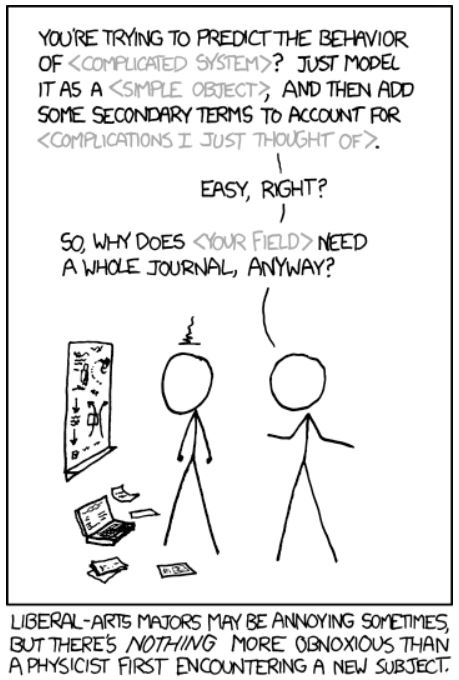

# Mass Balance Models

Let's say we are interested in quantifying how a chemical species in the atmosphere may change overtime. We can do by utilizing the idea of *conservation of mass* and building a *box model* of our area of interest.

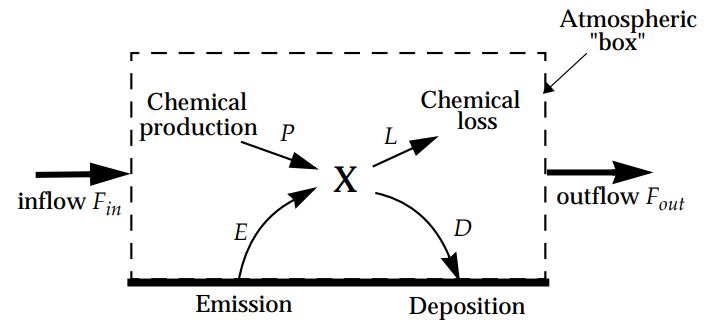

In our box, we have a chemical species of interest, $X$. We want to model the change in $X$ over time. The concentration of our species of interest will depend on several factors, including:

* Emissions - possibly natural or anthropogenic
* Chemistry - chemical reactions leading to production/consumption
* Transport - physical drivers (wind) that add/remove the chemical
* Deposition - removal through wet/dry deposition

When we take into consideration all of the ways that change influence the concentration of our chemical species, we can write a mass balance equation to give the change over time:

$$
\begin{align}
\frac{dX}{dt} &= S - L + F_{in} - F_{out} \tag{1}
\end{align}
$$

Where $S$ is the source term (sum of production and/or emission terms), $L$ is the loss term (sum of chemical loss and/or deposition), $F_{in}$ is the *flux in* term, and $F_{out}$ is the *flux out* term. The left-hand-side of equation 1, $\frac{dX}{dt}$, gives the rate of change of chemical $X$ in the box.

It is also worth noting that each term is in units of $\frac{\text{mass}}{\text{time}}$. The mass could be whatever units we want such as $\text{kg}$ or $\text{moles}$, but they must be consistent for all terms.  

# Residence Time, $\tau$

How long does a molecule spend inside the box before either being transported out or undergoing some sort of loss (deposition or chemical reaction)? Well, it varies molecule to molecule. But, if we just want to know the *average* amount of time for any molecule, we can use the following equation:

$$
\begin{align}
\tau &= \frac{M}{F_{out}+L} \tag{2}
\end{align}
$$

Where $\tau$ represents the *residence time* (also known as *lifetime*) of the molecule, with units in time. We can define *sink specific* lifetimes as:

$$
\begin{align}
\tau_{out} &= \frac{M}{F_{out}} \tag{3}
\end{align}
$$

So then the *total lifetime* is found by adding the individual lifetimes in parallel:

$$
\begin{align}
\frac{1}{\tau} &= \frac{1}{\tau_{out}} + \frac{1}{\tau_{L}}\tag{4}
\end{align}
$$

For some problems, we can assume a *1st order loss process*, which means that the magnitude of the sink, $L$, depends on the amount of the chemical in the box. It is helpful to imagine a water cooler tank with a leak at the bottom. The more water present in the tank, the more water that leaks out due to the higher pressure pushing down. But, as the tank empties, the pressure drops and the amount of water leaking slows. When this is the case, we can multiply the chemical mass in the box by the rate constant, $k$, to get the loss:

$$
\begin{align}
L &= kM \tag{5}
\end{align}
$$

With a little rearrangement, we see:

$$
\begin{align}
\frac{1}{k} &= \frac{M}{L} = \tau_L\tag{6}
\end{align}
$$

Therefore, the rate constant is the inverse of the lifetime of the chemical. The total rate constant is equal to the sum of individual loss process rate constants:

$$
\begin{align}
k = k_{out} + k_{L} \tag{7}
\end{align}
$$







# 1-Box Models

The most simple case for a box model is to have only 1 box. This means we do not need to worry about transport processes and our mass balance equation reduces to:

$$
\begin{align}
\frac{dM}{dt} &= S - L \tag{8}
\end{align}
$$

If we have a 1st order loss process as the sink term, we can write:

$$
\begin{align}
\frac{dM}{dt} &= S - kM \tag{9}
\end{align}
$$



# Steady-State

If our box observes no change in mass, then the left-hand-side of equation 9 is equal to 0 and the system is in *steady-state*:

$$
\begin{align}
\frac{dM}{dt} &= 0 \tag{10}
\end{align}
$$

This allows us to write:

$$
\begin{align}
S &= kM \tag{11}
\end{align}
$$

Which will allow us to solve for the magnitude of the source, the lifetime, or the mass inside our box (assuming we know 2 of the 3).

## Class Problem 1

From ice-core records, the mixing ratio of $\text{CH}_4$ in 1750 was ~725 ppb. If the mean atmospheric lifetime of $\text{CH}_4$ is ~10 years, what is the natural source emission rate of $\text{CH}_4$? Give your result in Tg $\text{CH}_4$ per year.

Helpful Notes:
* Mass of the atmosphere ~ $5.1 \times 10^{21} \ g$
* Molecular weight of air = $28.96 \ \frac{g}{mol}$
* $1$ ppb = $1 \times 10^{-9} \ \frac{part}{part}$
* $16$ grams = $1$ mole $\text{CH}_4$

# Non-steady-state

If we are not in steady-state, then there will be a change in mass over time. If we have only 1 sink and 1 source and observe an increase over time, then either the source term increased or the sink term decreased to produce the observed change.

It may be possible to simply add a second source term to describe an observed change, such as splitting the source term into a natural and anthropogenic term. Our mass balance equation is then:

$$
\begin{align}
\frac{dM}{dt} &= S_{ant} + S_{nat} - kM \tag{12}
\end{align}
$$

## Class Problem 2

Between 1750 and 2021, the observed average rate of change in $\text{CH}_4$ was $\approx 12 \ \frac{Tg \ (\text{CH}_4)}{yr}$.

Estimate the size of $S_{ant}$ using your steady-state value of $S_{nat}$. Compare to the IPCC AR6 estimated range of $336 - 375 \ \frac{Tg \ (\text{CH}_4)}{yr}$

# 1-Box Model Application: Radiocarbon Model

Cosmic ray bombardment of the atmosphere leads to the production of radioactive $^{14}C$ from interactions with $^{14}N$. The rate of production thus varies as a function of the cosmic-ray neutron flux to the atmosphere (which varies in time) and the abundance of nitrogen (which is effectively constant over the time scales of interest, millennia).

$^{14}C$ is radioactive and thus is lost from its Earth surface reservoirs through radioactive decay. Radiocarbon's abundance, $M$ is often characterized in terms of “radiocarbon units” ($1 \ \text{RCU} = 1026 \ ^{14}C \ atoms$).

Radiocarbon produced in the atmosphere rapidly combines with oxygen to form $\text{CO}_2$ and then gets photosynthesized or stirred into the ocean; most radiocarbon (92%) resides in the deep ocean.

We'll define the biosphere as the atmosphere, ocean, and living and decomposing biomass. The radiocarbon content of the biosphere, $M$, can be modeled with a box model.

Radiocarbon decays with a known rate that is linearly proportional to its abundance:

$$
\begin{align}
\frac{dM}{dt} &= L = -kM \tag{13}
\end{align}
$$

Where the decay constant, $k$, is equal to $1.209 \times 10^{-4} \ yr^{-1}$.



## Class Problem 3

Equation 13 has an exact solution we can solve for:

$$
\begin{align}
M = M_0 e^{-kt} \tag{14}
\end{align}
$$

Using equation 14, create a plot of the amount of radiocarbon present in a sample that has been isolated from the source of production. Have your y-axis represent the percent of radiocarbon left in the sample relative to the intitial amount, $\frac{M}{M_0}$, and the x-axis represent time spanning 50,000 years.

Once you have the plot, use equation 13 along with an ODE solver to numerically calculate the solution to the differential equation. Assume an initial mass $M_0 = 1$. The solution should be identical to your equation 14 solution.

Approximately how many lifetimes does the ratio $\frac{M}{M_0}$ take to reach 0?

## Class Problem 4

For now, let's assume a constant production rate of $S = 2.45 \ \frac{\text{RCU}}{yr}$.

**Calculate the steady-state mass of radiocarbon in the box.**

If we include the source term, our mass balance in equation 13 becomes:

$$
\begin{align}
\frac{dM}{dt} &= S - kM \tag{15}
\end{align}
$$

Assume that our box begins with $M_0 = 0 \ RCU$ at $t_0=0$. Make a plot of the mass $M$ in our 1-box model vs time. Again, use a time span of 50,000 years.  